# Titanic Dataset

**train.csv** contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table). To investigate this data, click on the name of the file on the left of the screen. Once you've done this, you can view all of the data in the window.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
# read the dataset
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Explore the Dataset

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [110]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [111]:
train.shape

(891, 12)

In [112]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [113]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


## 2. Study the variable target

In [114]:
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

### According to gender

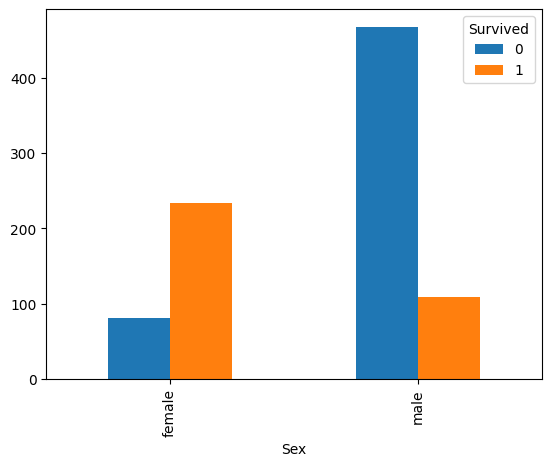

In [115]:
survived_gender = train.groupby(['Survived','Sex']).count()['PassengerId']
(survived_gender.unstack(level=0)).plot.bar()
plt.show()

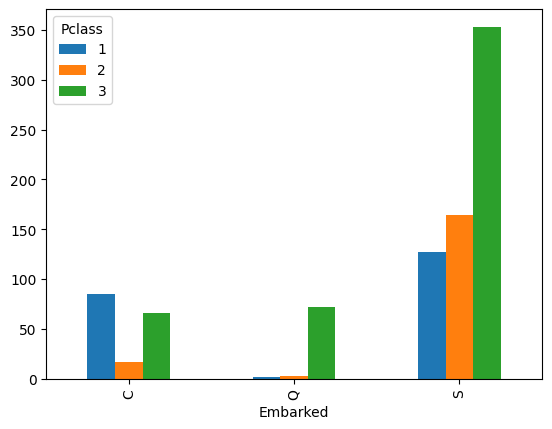

In [116]:
Embarked_Age = train.groupby(['Pclass', 'Embarked']).count()['PassengerId']
Embarked_Age.unstack(level=0,).plot.bar()
plt.show()

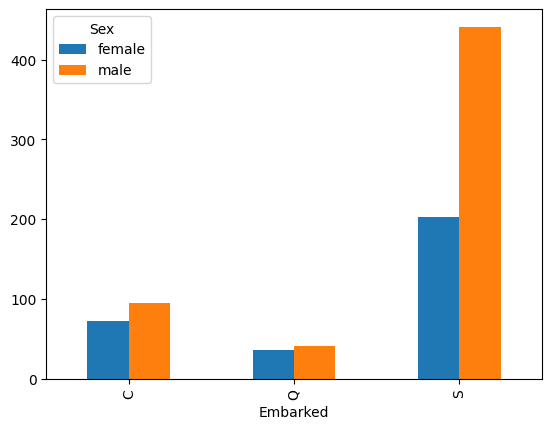

In [117]:
Embarked_Age = train.groupby(['Sex', 'Embarked']).count()['PassengerId']
Embarked_Age.unstack(level=0,).plot.bar()
plt.show()

#We come to the conclusion that Mayor men were embarked from the third class.

### We are at the data processing stage

In [118]:
train[['Survived', 'Pclass', 'Sex', 'Age']].head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [119]:
train[['Survived', 'Pclass', 'Sex', 'Age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [120]:
(train[train['Age'].isna()]
 .groupby(['Sex', 'Pclass'])
 .count()['PassengerId']
 .unstack(level=0))

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [121]:
(train[train['Age'].isna()]
 .groupby(['SibSp', 'Parch'])
 .count()['PassengerId']
 .unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


In [122]:
age_median = train['Age'].median() # ==>28
train['Age'] = train['Age'].fillna(age_median)
train[['Survived', 'Pclass', 'Sex', 'Age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [123]:
# #mapping the dataset in the column sex
# train['Sex'] = train['Sex'].map({'female':1, 'male':0}).astype(int)
train[['Survived', 'Pclass', 'Sex', 'Age']].head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [124]:
train[['Survived', 'Pclass', 'Sex', 'Age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [125]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [126]:
train['FlagAlone'] = np.where(
    (train['SibSp'] == 0) & (train['Parch'] == 0), 1,0)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FlagAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


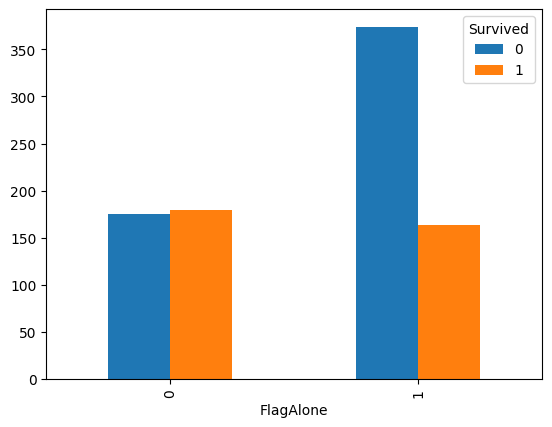

In [127]:
grouped_flag = train.groupby(['Survived', 'FlagAlone']).count()['PassengerId']
grouped_flag.unstack(level=0,).plot.bar()
plt.show()

In [128]:
train.groupby(['Survived','FlagAlone', 'Sex']).count()['PassengerId'].unstack(level=0)

Survived            0    1
FlagAlone Sex             
0         female   54  134
          male    121   45
1         female   27   99
          male    347   64

#### Conclusion
We could conclude that:

- Women had a higher overall survival rate than men.
- Passengers travelling with others (FlagAlone=0) had higher survival rates, especially women.
- Men travelling alone had the lowest survival rates.

##### Let's do the model test

In [130]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [131]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [132]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('data/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
